# Load data
Function for loading the data

In [66]:
import cv2, os
from PIL import Image
import numpy as np

def getDataSet(categories: list, folder: str):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(folder, category)
        label = categories.index(category)  # Assign a numerical label to each category
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))  # Resize to a common size
                    img = img / 255.0  # Normalize pixel values to [0, 1]
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return np.array(images), np.array(labels)


# Spilt and test data

1. Get the data set
2. Spilt data set into training and test
3. Dimensions data with categorical values
4. Generate training and test data with ImageDataGenerator. Data augmentation
5. Plot histograms for categorials and pixel values

Failed to load image: weather_dataset\Shine\shine131.jpg
Failed to load image: weather_dataset\Rain\rain141.jpg
y_categotical_train shape after reshape: (898, 4)
y_categotical_test shape after reshape: (225, 4)


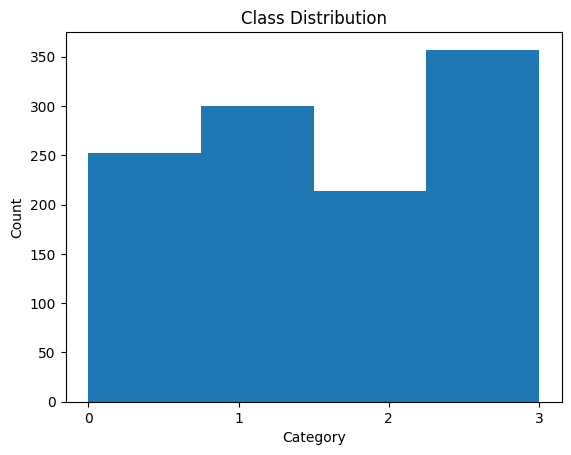

Category for image 0: Shine


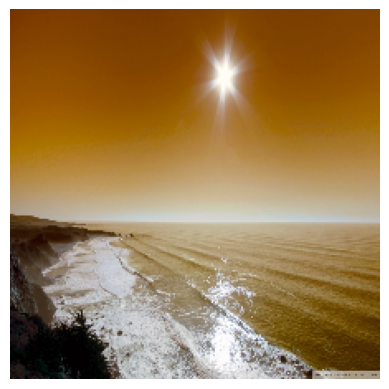

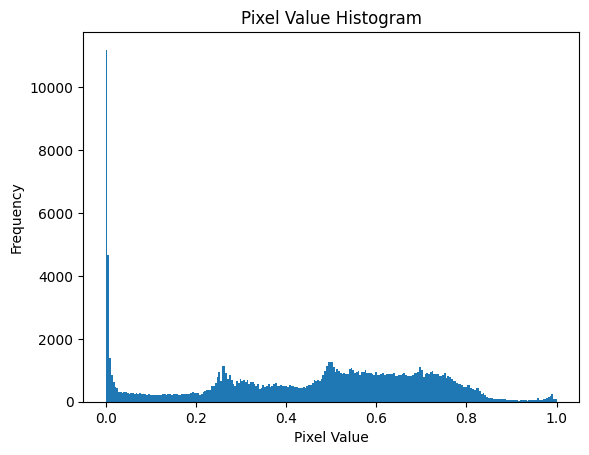

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical



data_folder = "weather_dataset"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]

#X is images
#y is labels

X, y = getDataSet(categories, data_folder)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

if y_train.ndim == 1 or y_test.ndim == 1:
        y_train = to_categorical(y_train, num_classes=4)
        y_test = to_categorical(y_test, num_classes=4)
        print("y_categotical_train shape after reshape:", y_train.shape)
        print("y_categotical_test shape after reshape:", y_test.shape)

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
validation_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

# Use the data_augmentation function to create an augmented data generator

# Assuming 'labels' is a list or NumPy array of category labels
# You can create histograms of the labels to visualize the class distribution
plt.hist(y, bins=len(np.unique(y)))  # Use as many bins as unique labels
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(np.unique(y))  # Set x-ticks to unique class labels
plt.show()

# Assuming 'images' is a NumPy array containing the image data
# You can create a histogram of pixel values for one image (e.g., the first image)
print(f"Category for image 0: {categories[y[0]]}")
  
plt.imshow(X[0])
plt.axis('off')  # Optional: Turn off the axis labels and ticks
#plt.title(categories[X[0]])
plt.show()

plt.hist(X[0].ravel(), bins=256, range=(0, 1))  # Assuming normalized pixel values in [0, 1]
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Histogram')
plt.show()

# Plot functions 
This needs to be cleaned up...

In [68]:
def plot_metrics(train_losses, train_accuracies):
    # Format data to np.array for easier use
    train_losses = np.array(train_losses)
    train_accuracies = np.array(train_accuracies)
    
    # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.title('Training Loss Over Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.title('Training Accuracy Over Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_folds(test_accuracies):
     # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Test Accuracy Over Iterations')
    plt.xlabel('KFolds')
    plt.ylabel('Loss')
    plt.legend()

def plot_generalization(n_epochs, folds, val_errors_list, train_errors_list):
    
    for i in range(folds):
        best_epoch = np.argmin(val_errors_list[i])
        best_val_rmse = np.sqrt(val_errors_list[i][best_epoch])

        # plt.figure(figsize=(10,5))
        # plt.annotate('Best model',
        #              xy=(best_epoch, best_val_rmse),
        #              xytext=(best_epoch, best_val_rmse + 1),
        #              ha="center",
        #              arrowprops=dict(facecolor='black', shrink=0.05),
        #              fontsize=16,
        #             )

        # for i in range(n_epochs):
        #     print(f"  epoch={i:4d}, mse_train={train_errors_list[i][i]:4.2f}, mse_val={val_errors_list[i][i]:4.2f}")
        
        #best_val_rmse -= 0.03  # just to make the graph look better
        plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
        plt.plot(np.sqrt(train_errors_list[i]), "b--", linewidth=2, label="Training set")
        plt.plot(np.sqrt(val_errors_list[i]), "g-", linewidth=3, label="Validation set")
        plt.legend(loc="upper right", fontsize=14)
        plt.xlabel("Epoch", fontsize=14)
        plt.ylabel("RMSE", fontsize=14)
        plt.show()

def plot_generalization_kfold(folds, val_errors_list, train_errors_list):
    best_kfold = np.argmin(val_errors_list)
    best_val_rmse = np.sqrt(val_errors_list[best_kfold])

    # plt.figure(figsize=(10,5))
    # plt.annotate('Best model',
    #              xy=(best_epoch, best_val_rmse),
    #              xytext=(best_epoch, best_val_rmse + 1),
    #              ha="center",
    #              arrowprops=dict(facecolor='black', shrink=0.05),
    #              fontsize=16,
    #             )

    # for i in range(n_epochs):
    #     print(f"  epoch={i:4d}, mse_train={train_errors_list[i][i]:4.2f}, mse_val={val_errors_list[i][i]:4.2f}")
    
    #best_val_rmse -= 0.03  # just to make the graph look better
    plt.plot([0, folds], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(train_errors_list), "b--", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors_list), "g-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Kfold", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()

def print_Average(test_accuracy, loss_per_fold):
    # Print out average value for the model
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')

# Create model

In [69]:
# Generate Model
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential 

def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5)),
    model.add(Dense(4, activation='softmax'))  # Change to 4 for your 4 classes

    # Plot the model
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy',"mae"])
    return model

# Train the model

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_model(createModel, X_train, y_train, folds, n_epochs, name):
    kfold = StratifiedKFold(n_splits=folds, shuffle=True)

    train_accuracies, train_losses, test_accuracies, test_losses = [], [], [], []
    train_errors_list, val_errors_list = [], []  # List to store train/validation errors for each fold

    best_model = None
    best_val_loss = float('inf')
    best_model_info = ""
    kfold_index = 0

    for train, val in kfold.split(X_train, y_train.argmax(1)):
        model = createModel()
        kfold_index += 1

        X_train_kfold, X_val_kfold = X_train[train], X_train[val]
        y_train_kfold, y_val_kfold = y_train[train], y_train[val]

        with tf.device('/device:GPU:0'):
            tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True)))
            history = model.fit(
                X_train_kfold, y_train_kfold,
                epochs=n_epochs,
                validation_data=validation_generator,
                batch_size=batch_size
            )

            # Check for NaN values in metrics
            if np.isnan(history.history['accuracy']).any() or np.isnan(history.history['loss']).any():
                print("NaN values detected in accuracy or loss.")



            # Extend the lists directly with values from the history object
            train_losses.extend(history.history['loss'])
            train_accuracies.extend(history.history['accuracy'])
            test_losses.extend(history.history['val_loss'])
            test_accuracies.extend(history.history['val_accuracy'])

        tf.keras.backend.clear_session()

    print_Average(test_accuracies, test_losses)

    plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors for each fold
    # plot_generalization(n_epochs, folds, val_errors_list, train_errors_list)

    # print(best_model_info)

    model.save_weights(f'{name}.h5')
    model_json = model.to_json()
    with open(f'{name}_model_architecture.json', 'w') as json_file:
        json_file.write(model_json)

    return best_model




# Retrain the model

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error

def retrain_and_evaluate_model(model, X_train, y_train, n_epochs, pre_best_model):
    # Load the pre-trained model using tf.keras.models.load_model

    test_accuracies, test_losses, train_accuracies, train_losses = [], [], [], []
    train_errors, val_errors = [], []

    best_model = None
    best_val_loss = pre_best_model
    best_model_info = ""

    # Clone the model and optimizer
    cloned_model = tf.keras.models.clone_model(model)
    cloned_model.set_weights(model.get_weights())

    cloned_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Set the learning rate

    cloned_model.compile(optimizer=cloned_optimizer, loss='mse', metrics=['accuracy'])

    for epoch in range(n_epochs):
        # Train the model on the entire training set
        history = cloned_model.fit(X_train, y_train, epochs=1, batch_size=64, verbose=0)

        # Record training metrics
        train_losses.append(history.history['loss'][0])
        train_accuracies.append(history.history['accuracy'][0])

        # Evaluate the model on the entire dataset
        test_loss, test_accuracy = cloned_model.evaluate(X_train, y_train)
        test_accuracies.append(test_accuracy)
        test_losses.append(test_loss)

        # Check if the current model has the lowest validation loss
        if test_loss < best_val_loss:
            best_val_loss = test_loss
            best_model = cloned_model
            best_model_info = f'Epoch: {epoch}'

        # Predict training data
        y_train_pred = cloned_model.predict(X_train, verbose=0)
        mse_train = mean_squared_error(y_train, y_train_pred)
        train_errors.append(mse_train)

    print_Average(test_accuracies, test_losses)

    plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors
    # plot_generalization(train_errors, val_errors)

    print(best_model_info)

    return best_model

# Evaluate the model

In [72]:
def getModel(name):
    from keras.models import load_model, model_from_json

    with open(f'{name}_model_architecture.json', 'r') as json_file:
        loaded_model_json = json_file.read()

    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(f'{name}.h5')

    # Load initial best validation loss from the saved model
    #loaded_model.get_config().get('initial_best_val_loss', (float('inf')))
    cloned_model = tf.keras.models.clone_model(loaded_model)
    cloned_model.set_weights(loaded_model.get_weights())
   
    cloned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    cloned_model.summary()
    return cloned_model

In [78]:
import tensorflow as tf
def evaluate_model(model, validation_generator):
    test_loss, test_accuracy = model.evaluate(validation_generator)
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(test_loss)}')
    print('------------------------------------------------------------------------')

# Run Model

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce RTX 2070 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5

Epoch 1/50
28/28 [==============================] - 3s 72ms/step - loss: 1.2318 - accuracy: 0.5135 - mae: 0.2788 - val_loss: 1.3986 - val_accuracy: 0.2978 - val_mae: 0.3687
Epoch 2/50
28/28 [==============================] - 1s 40ms/step - loss: 0.6869 - accuracy: 0.7209 - mae: 0.1812 - val_loss: 2.5125 - val_accuracy: 0.2889 - val_mae: 0.3671
Epoch 3/50
28/28 [==============================] - 1s 40ms/step - loss: 0.6160 - accuracy: 0.7735 - mae: 0.1677 - val_loss: 3.4310 - val_accuracy: 0.2889 - val_mae: 0.3554
Epoch 4/50
28/28 [==============================] - 1s 40ms/step - loss: 0.4982 - accuracy: 0.8173 - mae: 0.1332 - val_loss: 5.5381 - val_accuracy: 0.2889 - val_mae: 0.3557
Epoch 5/50
28/28 [==============================] - 1s 40ms/step - loss: 0.3876 - accuracy: 0.8632 - mae: 0.0979 - val_loss: 3.9752 - val_accurac

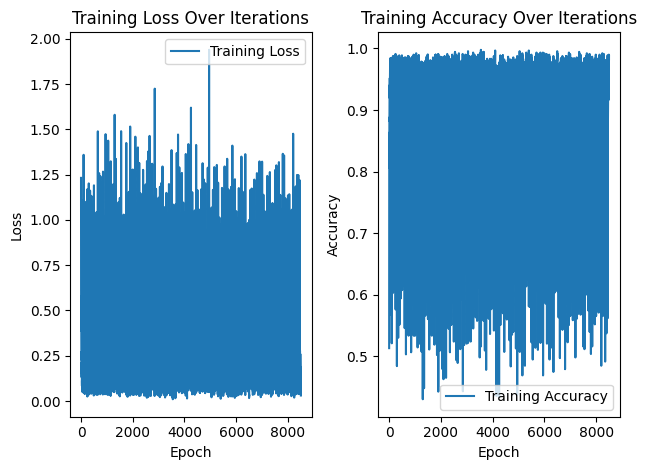

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [81]:

train_and_evaluate_model(createModel, X_train, y_train, folds=170, n_epochs=50, name="OwnDesign")
model = getModel("OwnDesign")
evaluate_model(model, validation_generator)